In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
%matplotlib inline

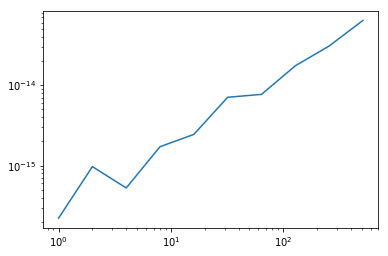

In [10]:
n = []

for k in range(1, 11):
    H = la.hilbert(2**k)
    Q, R = la.qr(H, mode='economic')
    n.append(np.linalg.norm(H - Q.dot(R), np.inf))
plt.loglog(pow(2,np.arange(10)), n)

Scheint also linear mit der Größe der Matrix zu wachsen

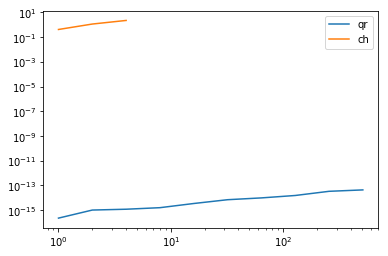

In [27]:
qr = []
ch = []

for k in range(1, 11):
    H = la.hilbert(2**k)
    Q, R = la.qr(H, mode='economic')
    qr.append(np.linalg.norm(H.T.dot(H) - R.T.dot(R), np.inf))
    try:
        L = np.linalg.cholesky(H)
        ch.append(np.linalg.norm(H.T.dot(H) - L.dot(L.T), np.inf))
    except np.linalg.LinAlgError:
        ch.append(0)
    
plt.loglog(pow(2,np.arange(10)), qr, label="qr")
plt.loglog(pow(2,np.arange(10)), ch, label="ch")
plt.legend()

Die QR Zerlegung ist also deutlich stabiler für Die Hilbert-Matrix als
die Cholesky Zerlegung.

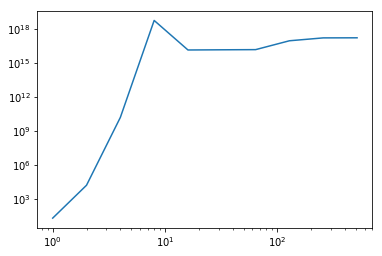

In [24]:
cond2 = []
for k in range(1, 11):
    H = la.hilbert(2**k)
    U, s, VT = la.svd(H)
    cond2.append(max(s)/min(s))

plt.loglog(pow(2,np.arange(10)), cond2)